# 전처리

In [1]:
from matplotlib.pyplot import rc
import matplotlib.pyplot as plt
rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"]

True

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv("/Users/ijiseon/Desktop/영화 관객수/movies_train.csv")

In [4]:
pd.options.display.float_format = '{:.1f}'.format

In [5]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [6]:
train['release_time']=pd.to_datetime(train['release_time'])

In [7]:
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

# 1. 개봉시기 

## 1-1. 개봉 연도별 인기 장르의 평균 관객 수

['느와르', '액션', 'SF', '코미디', '드라마']


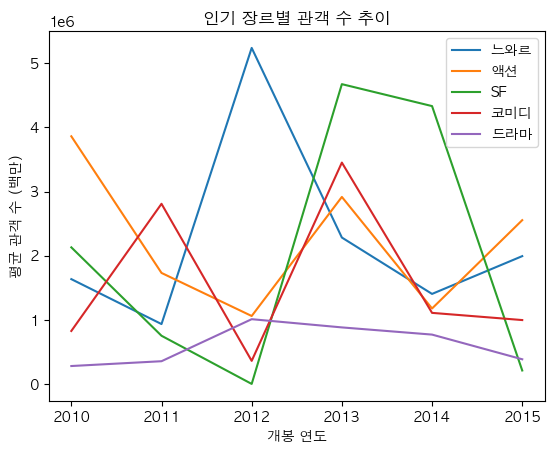

In [8]:
# 평균 관객 수가 가장 많은 인기 장르 5개 구하기
top5_genre = train.groupby('genre').box_off_num.mean()          # 평균 관객 수 구하기
top5_genre = top5_genre.nlargest(5).index.tolist()              # 상위 5개 장르만 리스트 형태로 저장
print(top5_genre)

# 인기 장르 TOP 5는 느와르, 액션, SF, 코미디, 드라마

# 인기 장르 TOP 5의 월별 평균 관객 수 구하기
top5_avg = train[train.genre.isin(top5_genre)].groupby(['genre','release_year']).box_off_num.mean().reset_index()
top5_avg = pd.DataFrame(top5_avg)

for genre in top5_genre:
  genre_data = top5_avg[top5_avg['genre'] == genre]
  plt.plot(genre_data['release_year'], genre_data['box_off_num'], label=genre)


plt.xlabel('개봉 연도')
plt.ylabel('평균 관객 수 (백만)')
plt.title('인기 장르별 관객 수 추이')
plt.legend()

plt.show()

### 분석  
> 연도별로 어떤 장르의 영화가 인기 있었는지 볼 수 있다.  
> 2012년에 느와르 장르의 관객 수가 굉장히 많고, 2014년에는 5개의 장르 모두 전년도에 비해 하락한 것이 눈에 띈다.

* 모든 장르로 그려봤을때, 연도별 사회적 분위기나 사건에 의해 특정 장르가 영향을 받을까?
> ex) 가설 : 2014년 세월호 사건으로 인해 다큐멘터리 장르의 평균 관객 수가 늘었을 것이다.

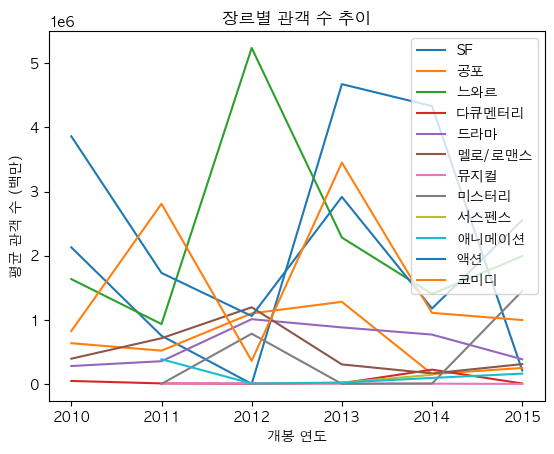

In [10]:
# 모든 장르의 연도별 평균 관객 수

all_genre = train.groupby('genre').box_off_num.mean()
all_genre = all_genre.index.tolist()

all_avg = train[train.genre.isin(all_genre)].groupby(['genre','release_year']).box_off_num.mean().reset_index()
all_avg = pd.DataFrame(all_avg)

for genre in all_genre:
  genre_data = all_avg[all_avg['genre'] == genre]
  plt.plot(genre_data['release_year'], genre_data['box_off_num'], label=genre)

plt.xlabel('개봉 연도')
plt.ylabel('평균 관객 수 (백만)')
plt.title('장르별 관객 수 추이')
plt.legend()

* 실제로 2014년에 다큐멘터리 장르의 평균 관객 수가 늘어났다.
> 그렇다면 실제로 세월호 사건과 관련이 있는 다큐멘터리 영화가 흥행했을까?

In [12]:
# 2014년 흥행한 다큐멘터리 영화 살펴보기
dacu = train[(train['genre']=='다큐멘터리')&(train['release_year']==2014)]
dacu.sort_values(by='box_off_num', ascending=False)[0:5]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
267,"님아, 그 강을 건너지 마오",CGV아트하우스,다큐멘터리,2014-11-27,86,전체 관람가,진모영,5105.0,1,3,2,4802169,2014,11,27,3
204,다이빙벨: 진실은 침몰하지 않습니다,시네마달,다큐멘터리,2014-10-23,77,15세 관람가,이상호,0.0,0,35,1,50308,2014,10,23,3
407,다이빙벨,시네마달,다큐멘터리,2014-10-23,77,15세 관람가,이상호,0.0,0,35,1,50308,2014,10,23,3
117,그 사람 그 사랑 그 세상,THE 픽쳐스,다큐멘터리,2014-11-20,82,전체 관람가,권혁만,0.0,0,1,4,42337,2014,11,20,3
557,목숨,필라멘트 픽쳐스,다큐멘터리,2014-12-04,95,12세 관람가,이창재,0.0,0,139,4,38771,2014,12,4,3


* '다이빙벨:진실은 침몰하지 않습니다' 등 세월호 사건과 관련된 영화가 개봉하긴 했으나 흥행하지 못함
* 흥행작인 '님아, 그 강을 건너지 마오'가 2014년 다큐멘터리 평균 관객수에 대부분의 영향을 주었을 것으로 예상되지만, 세월호 사건이나 사회적 분위기와는 연관이 없어 보임
> 결론적으로, 연도별 사회적 분위기나 사건에 의해 영향을 받기 보다는 장르에 흥행작이 있는지가 더 중요할 것으로 분석했다.

## 1-2. 연도별 총 관객 수, 영화 개봉 수
* 개봉 연도별 인기 장르의 평균 관객 수 그래프의 추가 분석을 위해 연도별 총 관객 수와 영화 개봉 수 그래프를 그려보았다.

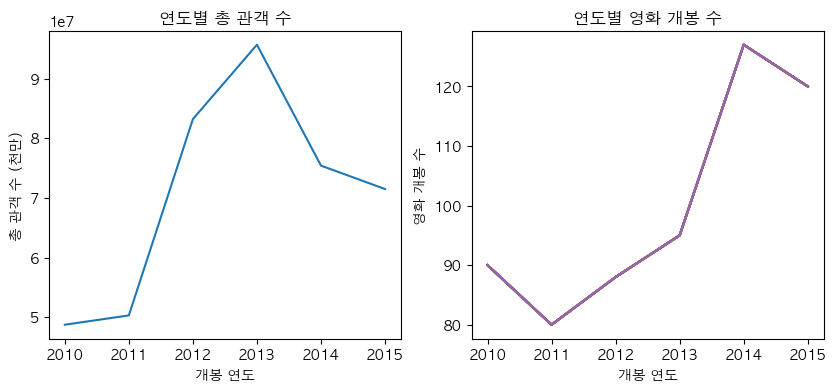

In [14]:
# 그래프 생성
plt.figure(figsize=(10, 4))

# 총 관객 수 그래프
plt.subplot(1, 2, 1)

boxoff_sum = train.groupby('release_year')['box_off_num'].sum()
plt.plot(boxoff_sum.index, boxoff_sum.values)

plt.xlabel('개봉 연도')
plt.ylabel('총 관객 수 (천만)')
plt.title('연도별 총 관객 수')

# 영화 개봉 수 그래프
plt.subplot(1, 2, 2)

total_count = train.groupby('release_year').count()
plt.plot(total_count.index, total_count.values)

plt.xlabel('개봉 연도')
plt.ylabel('영화 개봉 수')
plt.title('연도별 영화 개봉 수')

plt.show()

### 분석  
> **2012년** : 총 관객 수가 이전 년도에 비해 급격하게 늘어났는데, 느와르 영화의 흥행이 이에 많은 영향을 준 것으로 예상된다.  
> **2014년** : 개봉된 영화 수는 연도 중 가장 많았으나, 전체적으로 모든 장르에서 평균 관객 수가 줄어들었고 실제로 총 관객 수도 줄어든 것을 보았을 때, 전년도에 비해 크게 흥행한 작품이 많이 없었던 것으로 예상할 수 있다.

## 1-3. 월별 개봉장르

In [16]:
train5 = train.copy()

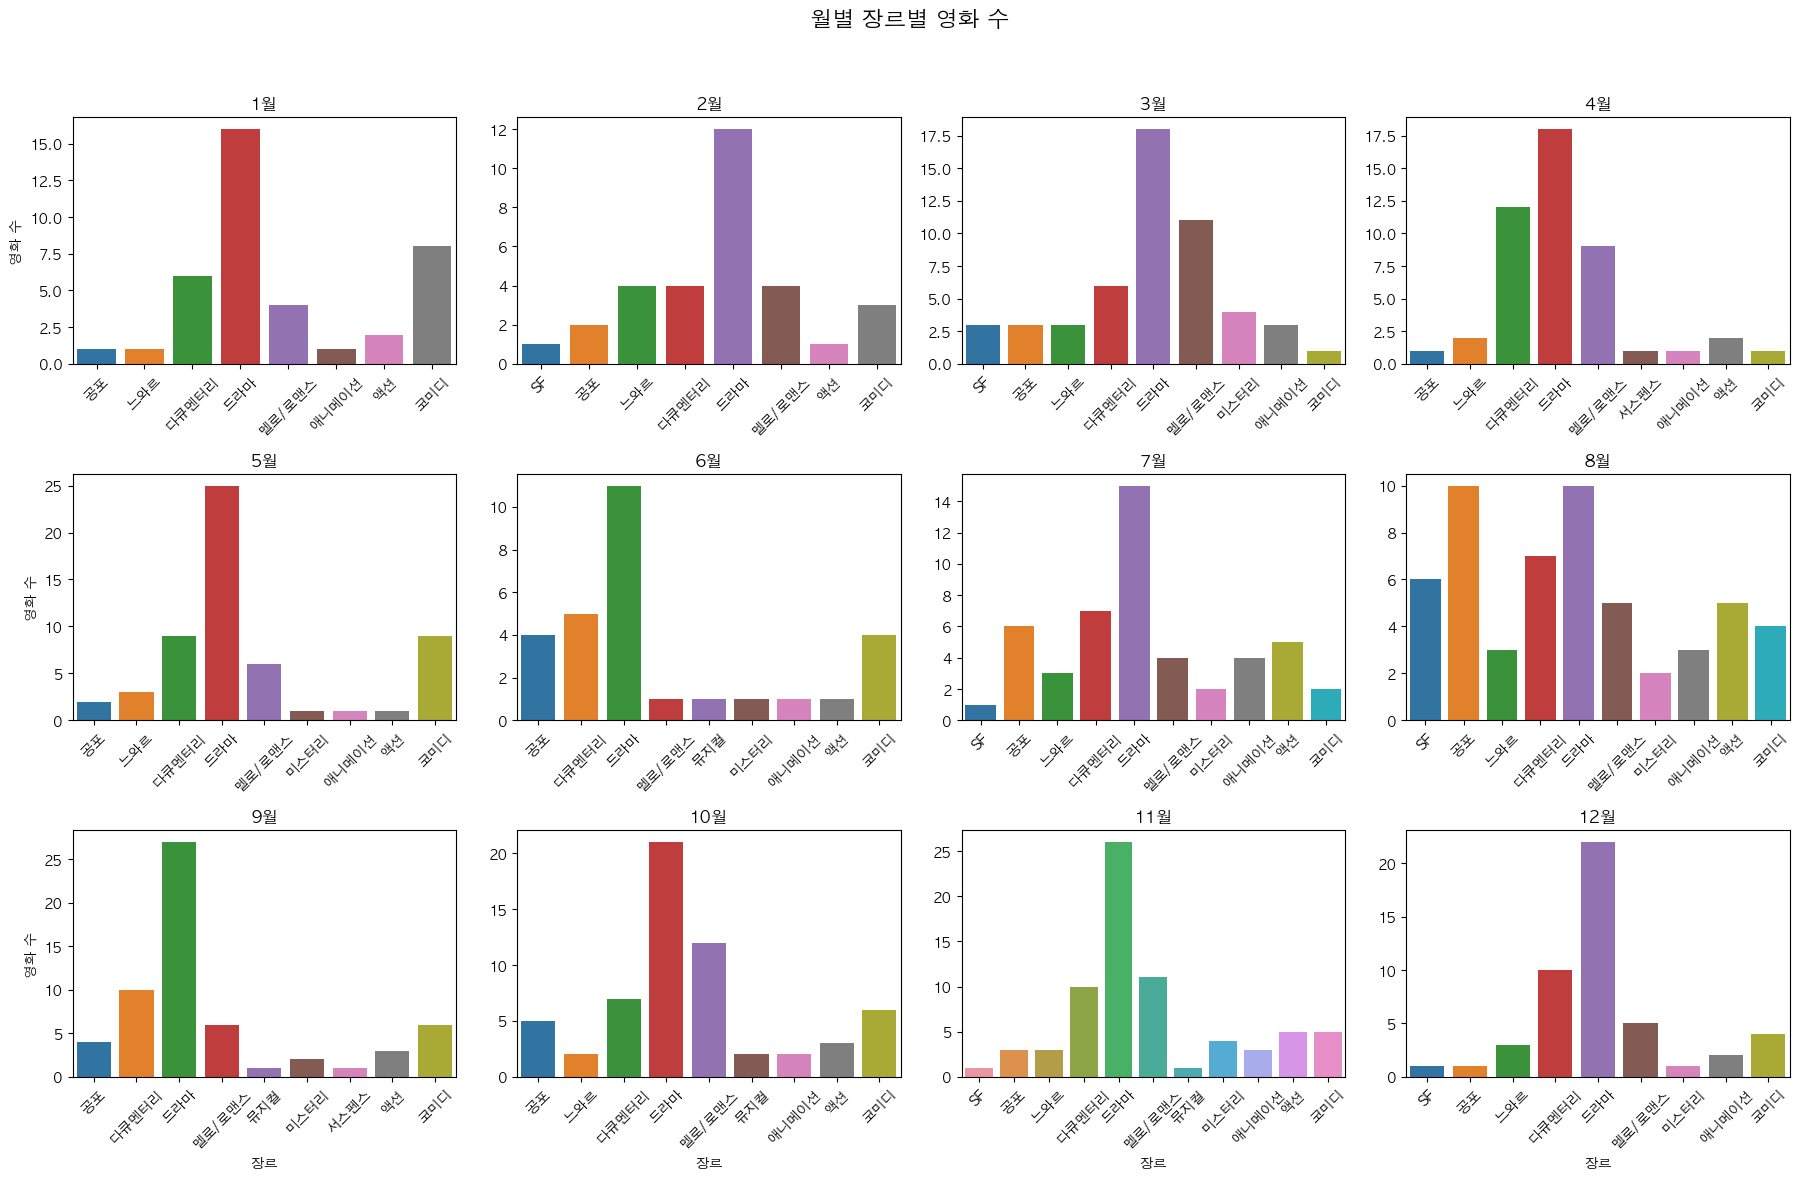

In [17]:
# 시각화 설정
plt.figure(figsize=(18, 12))

genre_counts_by_month = train5.groupby(['release_month', 'genre']).size().reset_index(name='count')

# 월별로 서브플롯 생성
for i, month in enumerate(range(1, 13), start=1):
    plt.subplot(3, 4, i)  # 3행 4열의 서브플롯 중 i번째 서브플롯 선택

    # 해당 월의 데이터 추출
    data_month = genre_counts_by_month[genre_counts_by_month['release_month'] == month]

    # 막대 그래프 그리기
    sns.barplot(x='genre', y='count', data=data_month)

    # 서브플롯의 제목 설정
    plt.title(f'{month}월')

    # x축 레이블 설정 (맨 아래의 그래프에만 표시)
    if i > 8:
        plt.xlabel('장르')
    else:
        plt.xlabel('')

    # y축 레이블 설정 (맨 왼쪽의 그래프에만 표시)
    if i % 4 == 1:
        plt.ylabel('영화 수')
    else:
        plt.ylabel('')

    # 그래프의 x축 눈금 라벨 회전
    plt.xticks(rotation=45)

# 전체 그래프의 제목 설정
plt.suptitle('월별 장르별 영화 수', fontsize=16)

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 표시
plt.show()


### 분석
> 1월부터 12월까지 항상 드라마 장르 개봉수가 압도적인 것을 알 수 있다. 특이한 결과로는 오직 8월에 공포가 드라마와 비슷한 개봉작수를 가지고 있다는 점이다.

## 1-4. 분기별 개봉 장르

> 1,2,3월은 새해 시작과 함께 1분기, 7,8,9월은 무더운 여름이라는 특성과 함께 3분기, 10,11,12월은 한해의 마무리와 크리스마스 등 1년을 12달로도 나눌 수 있지만 4분기로도 나눌 수 있다. <br>
> 또한 분기별 특성이 존재해, 분기별 개봉장르를 살펴보았다. 

In [18]:
train1 = train.copy()

In [19]:
def myquarter(x):
    if x==1 or x==2 or x==3 : return "Q1"
    elif x==4 or x==5 or x==6 : return "Q2"
    elif x==7 or x==8 or x==9 : return "Q3"
    else : return "Q4"

In [20]:
train1["release_Q"] = train1["release_month"].apply(myquarter)

In [22]:
train1[["genre","release_Q"]].groupby("release_Q").value_counts()

release_Q  genre 
Q1         드라마       46
           멜로/로맨스    19
           다큐멘터리     16
           코미디       12
           느와르        8
           공포         6
           애니메이션      4
           미스터리       4
           SF         4
           액션         3
Q2         드라마       54
           다큐멘터리     26
           멜로/로맨스    16
           코미디       14
           공포         7
           느와르        5
           액션         4
           애니메이션      3
           미스터리       2
           뮤지컬        1
           서스펜스       1
Q3         드라마       52
           다큐멘터리     24
           공포        20
           멜로/로맨스    15
           액션        13
           코미디       12
           SF         7
           애니메이션      7
           미스터리       6
           느와르        6
           뮤지컬        1
           서스펜스       1
Q4         드라마       69
           멜로/로맨스    28
           다큐멘터리     27
           코미디       15
           공포         9
           액션         8
           느와르        8
           애니메이션      

> 의사결정

- 드라마 장르는 "장르적" 특성이 크지 않고 분기별로 매번 높은 빈도수를 보이고 있기 때문에, "분기별 나오는 장르 차이" 그래프에서 제외
- 드라마라는 장르에 대한 영화들에 따로 해석하기로 결정
- 장르가 너무 다양하고, 다 표현한다면 한눈에 보기 어렵다고 파악해서 분기별 자주 나오는 top5 장르만 뽑기로 결정

In [24]:
train3 = train1.copy()
train3 = train3[train3.genre != "드라마"]
train3[["genre","release_Q"]].groupby("release_Q").value_counts()

release_Q  genre 
Q1         멜로/로맨스    19
           다큐멘터리     16
           코미디       12
           느와르        8
           공포         6
           애니메이션      4
           미스터리       4
           SF         4
           액션         3
Q2         다큐멘터리     26
           멜로/로맨스    16
           코미디       14
           공포         7
           느와르        5
           액션         4
           애니메이션      3
           미스터리       2
           서스펜스       1
           뮤지컬        1
Q3         다큐멘터리     24
           공포        20
           멜로/로맨스    15
           액션        13
           코미디       12
           애니메이션      7
           SF         7
           미스터리       6
           느와르        6
           서스펜스       1
           뮤지컬        1
Q4         멜로/로맨스    28
           다큐멘터리     27
           코미디       15
           공포         9
           액션         8
           느와르        8
           애니메이션      7
           미스터리       5
           뮤지컬        3
           SF         2
dtype: int64

In [25]:
mytrain = train3[["genre","release_Q"]].groupby("release_Q").value_counts()
mytrain=mytrain.reset_index()
mytrain.columns = ["opening_Q", "genre", "opening_C"]

In [26]:
mytrain.loc[mytrain["genre"]=="멜로/로맨스","genre"] = "로맨스"
mytrain.loc[mytrain["genre"]=="다큐멘터리","genre"] = "다큐"
#해당부분은 그래프 편의 상 글자수를 줄이기 위해 바꿈

In [27]:
mytrain_Q1 = mytrain[:5]
mytrain_Q2 = mytrain[9:14]
mytrain_Q3 = mytrain[19:24]
mytrain_Q4 = mytrain[30:36]
#각분기별 top5를 뽑음

In [28]:
color1 = ["pink","dimgray","gold","black","red"]
color2 = ["dimgray","pink","gold","red","black"]
color3 = ["dimgray","red","pink","midnightblue","gold"]
color4 = ["pink","dimgray","gold","red","midnightblue","black"]

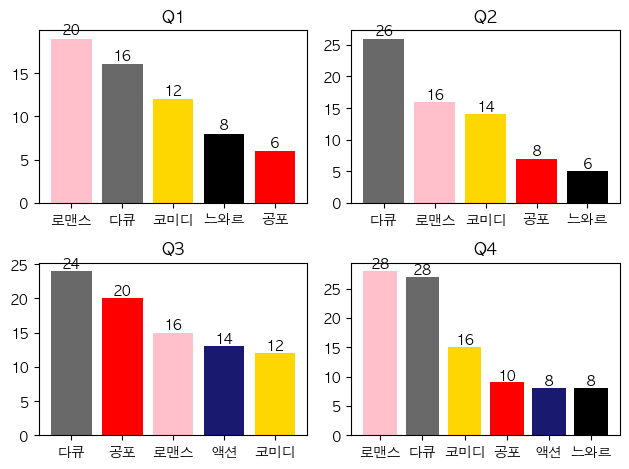

In [29]:
fig, axes = plt.subplots(2,2)

bar1=axes[0][0].bar(mytrain_Q1.genre,mytrain_Q1.opening_C,color=color1)
axes[0][0].set_title("Q1")
for rect1 in bar1.patches:
    height1 = rect1.get_height()+0.5
    axes[0][0].text(rect1.get_x()+rect1.get_width()/2.0, height1, "%.f"%height1, ha="center",size=10)

bar2=axes[0][1].bar(mytrain_Q2.genre,mytrain_Q2.opening_C,color=color2)
axes[0][1].set_title("Q2")
for rect2 in bar2.patches:
    height2 = rect2.get_height()+0.5
    axes[0][1].text(rect2.get_x()+rect2.get_width()/2.0, height2, "%.f"%height2, ha="center")

bar3=axes[1][0].bar(mytrain_Q3.genre,mytrain_Q3.opening_C,color=color3)
axes[1][0].set_title("Q3")
for rect3 in bar3.patches:
    height3 = rect3.get_height()+0.5
    axes[1][0].text(rect3.get_x()+rect3.get_width()/2.0, height3, "%.f"%height3, ha="center")
    
bar4=axes[1][1].bar(mytrain_Q4.genre,mytrain_Q4.opening_C,color=color4) 
axes[1][1].set_title("Q4")
for rect4 in bar4.patches:
    height4 = rect4.get_height()+0.5
    axes[1][1].text(rect4.get_x()+rect4.get_width()/2.0, height4, "%.f"%height4, ha="center")

plt.tight_layout()
plt.show()

### 분석

> 1분기 4분기는 멜로/로맨스가 확실히 다른 분기에 비해 나오는 편수가 많아짐. 특히 4분기 <br>
> 3분기에는 공포 장르 영화 개봉이 확실히 많아짐<br>
> 드라마를 제외한 장르중 매 분기 top5 안에 드는 것은 "로맨스, 다큐, 코미디, 공포" <br>
> 사실상 매분기 나오는 장르가 거의 비슷하다는 점에서 우리나라에서는 SF, 미스터리, 애니메이션 등 과 같은 영화 제작이 흔하지 않음을 확인<br>

# 2. 흥행정도

## 2.1 배급사별 흥행정도

### 한국영화산업계의 문제 
- 극장을 소유하는 동시에 멀티 배급사, 즉 투자 배급사인 동시에 극장을 소유한 상태
- 3대 멀티플렉스 cgv, 롯데, 메가박스가 스크린 97%를 점유 
- 대기업 계열사가 아닌 투자 배급사한테 극장에는 유리하고 배급사들에게 약탈적이라고 할 수 있는 상영 조건을 강요 <-> 대기업 계열사는 극장도 소유하고 있으니까 유리한 반면 중소는 극장을 가진 게 아니고 배급만 하는 거니까 과정 계속되면서 중소 배급사 몰락
- 저예산 영화들은 투자처를 찾기가 힘드니까 제작 자체가 힘들어진다거나 제작이 된다고 해도 배급에 있어서는 상영관 확보 문제 맞닥트림 <-> 반면 3사랑 같은 계열사 영화의 경우에는 오히려 개봉 전에 상영관을 확보를 해놓는다거나 성적이 안좋아도 계속 상영간을 유지할 수 있게 함

**영화산업 수직계열화**
- CJ, 넥스트엔터테인먼트월드, 롯데컬처웍스, 콘텐트리중앙
- CJ –> CGV
- 롯데 엔터 –> 롯데시네마 
- 넥스트엔터테인먼트(뉴)
- 쇼박스(-> 콘텐트리중앙) –> 메가박스 

In [30]:
suc = train.copy()
suc1 = suc[["distributor","box_off_num"]].groupby("distributor").mean()


In [31]:
suc1.sort_values(by="box_off_num")

,box_off_num
distributor,
인피니티엔터테인먼트,2.0
고구마공작소,8.0
사람과 사람들,42.0
위드시네마,46.0
나우콘텐츠,54.0
...,...
영구아트무비,2541603.0
쇼박스(주)미디어플렉스,2634823.0
(주)아이필름코퍼레이션,3117859.0


In [32]:
topdis = suc1.sort_values(by="box_off_num").tail(30)

In [33]:
topdis = topdis.reset_index()

In [34]:
#앞서 언급한 수직계열화 성공한 배급사들 big4
cjlist = ['CGV아트하우스','CJ E&M Pictures', 'CJ E&M 영화부문', 'CJ 엔터테인먼트']
lottelist = ['롯데엔터테인먼트']
newlist = ['(주)NEW','NEW']
showlist = ['(주)쇼박스','쇼박스(주)미디어플렉스',"메가박스(주)플러스엠"]
#설명을 위해 세부적으로 나누었지만 big4로 이 배급사들을 모두 합쳐 이용할 예정 
big4= ['CGV아트하우스','CJ E&M Pictures', 'CJ E&M 영화부문', 'CJ 엔터테인먼트','롯데엔터테인먼트','(주)NEW','NEW','(주)쇼박스',"메가박스(주)플러스엠",'쇼박스(주)미디어플렉스']

top30=topdis["distributor"].unique().tolist()
notbs = top30.copy()
for i in big4:
    notbs.remove(i)
#big4는 아니지만 흥행기준으로 봤을 때 배급사크기가 큰 것들 - notbs

In [35]:
finalsuc = suc[["distributor","release_year","box_off_num"]].groupby(["distributor","release_year"]).mean()

In [36]:
finalsuc # 배급사별, 연도별 관람객수를 의미

box_off_num
distributor    release_year             
(주) 브릿지웍스      2013               6054.0
               2014               2370.5
(주) 액티버스엔터테인먼트 2014                891.0
               2015                329.0
(주) 영화사조제      2011              12837.6
...                                  ...
한국YWCA연합회      2014                 71.0
홀리가든           2013               3177.0
               2015               1236.3
화앤담이엔티         2011              60944.0
               2012             283449.0

[289 rows x 1 columns]

In [37]:
mysuc = finalsuc.reset_index()

In [38]:
small=mysuc.loc[~(mysuc["distributor"].isin(top30))]
notbignotsmall = mysuc.loc[mysuc["distributor"].isin(notbs)]
big4=mysuc.loc[mysuc["distributor"].isin(big4)]

#관람객 흥행기준 top30안에 안들어가는 배급사들 = small 
#top30이지만 수직계열화하지못한 배급사들 = notbignotsmall
#수직계열화한 배급사들 = big4

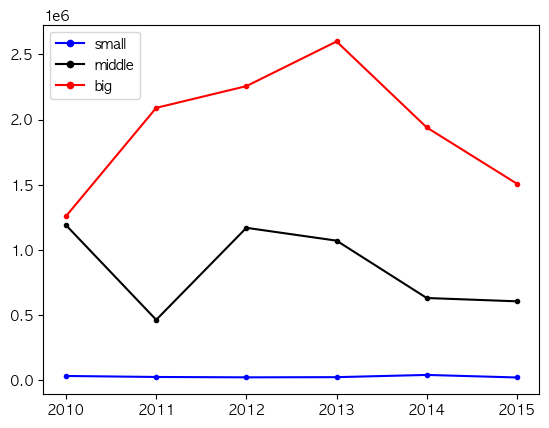

In [39]:
dist_s=small[["release_year","box_off_num"]].groupby("release_year").mean()
dist_m=notbignotsmall[["release_year","box_off_num"]].groupby("release_year").mean()
dist_b=big4[["release_year","box_off_num"]].groupby("release_year").mean()

dist_s = dist_s.reset_index()
dist_m = dist_m.reset_index()
dist_b = dist_b.reset_index()

plt.plot(dist_s["release_year"],dist_s["box_off_num"], color = 'blue', label="small",marker = 'o', linestyle = 'solid',markersize=3)
plt.plot(dist_m["release_year"], dist_m["box_off_num"], color = "black", label="middle",marker = 'o', linestyle = 'solid',markersize=3)
plt.plot(dist_b["release_year"], dist_b["box_off_num"], color = "red",label="big", marker = 'o', linestyle = 'solid',markersize=3)
plt.legend(loc="upper left",markerscale=1.5)

    
plt.show()

### 분석

> 대형 배급사들이 흥행에 있어 우위에 있으며, <br>
특히 2010년을 기점으로 차이가 크게 벌어졌음을 확인할 수 있다

## 2.2 감독이 이전에 제작한 영화의 수와 현재 영화의 관객수의 관계

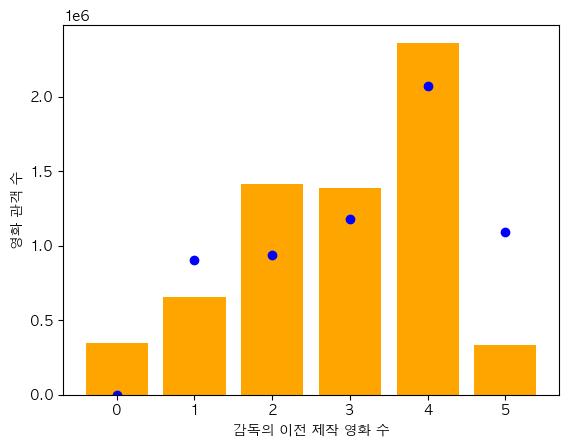

In [40]:
#막대그래프: 감독이 과거에 제작했던 영화 수에 따른 현재 영화 관객수의 평균
prevdata=train[['dir_prev_num','box_off_num']].groupby('dir_prev_num').mean()

x=[0,1,2,3,4,5]
plt.bar(x,prevdata['box_off_num'],color='orange')
plt.xlabel('감독의 이전 제작 영화 수')
plt.ylabel('영화 관객 수')

#점 : 감독이 과거에 제작했던 영화 수에 따른 과거 영화의 평균 관객수
prevdata2=train[['dir_prev_num','dir_prev_bfnum']].groupby('dir_prev_num').mean()
plt.scatter(x,prevdata2['dir_prev_bfnum'],color='blue')

plt.show()

### 분석
> 과거 제작한 영화 수가 4개가 될 때까지 현재 영화 관객 수가 점점 늘어난다는 것을 확인할 수 있다.

> 이전에 제작했던 영화의 관객 수보다 대체적으로 현재 영화의 관객 수 평균이 높음을 볼 수 있다.

> 이전에 제작했던 영화의 수가 늘어날 수록 관객들에게 인지도가 높아져, 현재의 영화관람객들이 수가 대체로 늘어났을 것이라고 예측할 수 있었다.

## 2-3. 상영등급별 영화 개봉 수와 평균 관객수 비교

In [41]:
train2 = train.copy()

Text(0.5, 1.0, '상영등급별 영화 개봉 수(막대 그래프)와 평균 관객수(꺾은선 그래프)')

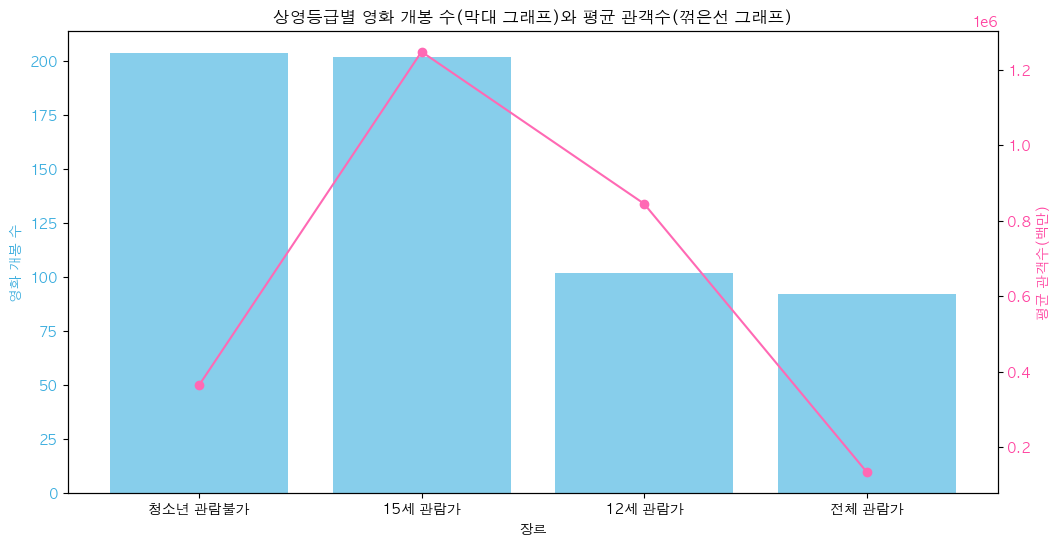

In [42]:
# 상영등급별 영화 개봉 수 계산
screening_rat_counts = train2['screening_rat'].value_counts()

# 상영등급 평균 관객수 계산
avg_boxoff = train2.groupby('screening_rat')['box_off_num'].mean()
avg_boxoff = avg_boxoff[screening_rat_counts.index]

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 개봉 개수 막대 그래프 (왼쪽 y축)
plt.bar(screening_rat_counts.index, screening_rat_counts, color='skyblue')
plt.xlabel('장르')
plt.ylabel('영화 개봉 수', color='#3aadde')
plt.tick_params(axis='y', labelcolor='#3aadde')

# 꺾은선 그래프 (오른쪽 y축)
ax2 = plt.twinx()
ax2.plot(avg_boxoff.index, avg_boxoff, marker='o', color='hotpink', linestyle='-')
ax2.set_ylabel('평균 관객수(백만)', color='#ff42a0')
ax2.tick_params(axis='y', labelcolor='#ff42a0')

plt.title('상영등급별 영화 개봉 수(막대 그래프)와 평균 관객수(꺾은선 그래프)')

### 분석
> 상영등급 중 '청소년 관람불가'와 '15세 관람가'가 가장 많이 개봉하였으나 실제 평균 관객수는 이와 차이를 보임을 알 수 있다.

## 2-4. 배급사별 제작 선호 장르와 실제 흥행 장르 

**TOP 5 배급사별 선호하는 장르와 실제로 흥행한 장르**
* 영화 제작 수가 가장 많은 배급사 TOP 5 별로 어느 장르를 많이 제작했는지(선호하는지) 그래프와 각 배급사에서 실제로는 어떤 장르가 가장 흥행했는지 별모양으로 표시함

In [43]:
# 영화 제작 수가 가장 많은 배급사 TOP 5
top5_dist = train['distributor'].value_counts().nlargest(5).index.tolist()
top5_dist

['CJ 엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스']

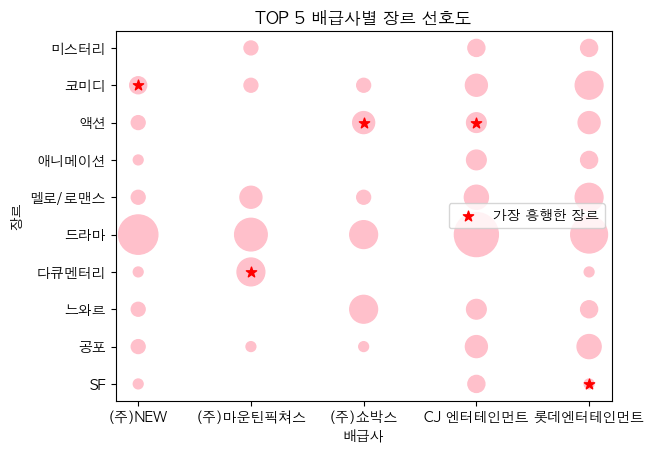

In [44]:
# 각 배급사의 장르별 영화 제작 수를 genre_counts에 저장
genre_counts = train[train.distributor.isin(top5_dist)].groupby(['distributor', 'genre']).size().reset_index(name='count')

# 점의 크기는 영화 제작 수에 비례
plt.scatter(genre_counts['distributor'], genre_counts['genre'], color='pink', s=genre_counts['count'] * 50)
plt.title('TOP 5 배급사별 장르 선호도')
plt.xlabel('배급사')
plt.ylabel('장르')

# 각 배급사의 평균 관객 수가 가장 많은 장르(가장 흥행한 장르)를 top_genre에 저장
top_genre = train[train.distributor.isin(top5_dist)].groupby(['distributor', 'genre']).box_off_num.mean().reset_index()
top_genre = top_genre.loc[top_genre.groupby('distributor')['box_off_num'].idxmax()]

# 가장 흥행한 장르를 별모양으로 표시
plt.scatter(top_genre['distributor'], top_genre['genre'], color='red', s = 60, marker='*', label='가장 흥행한 장르')
plt.legend()

plt.show()

### 분석
> 배급사들은 대부분 드라마 장르 제작을 선호하지만 실제 관객들에게 선호되는 장르는 다르다는 것을 알 수 있다.

* 위 그래프의 분석 결과에 이어서, 실제 관객들에게 선호되는 장르는 무엇일까?
> 장르별로 영화 개봉 수와 평균 관객 수를 비교

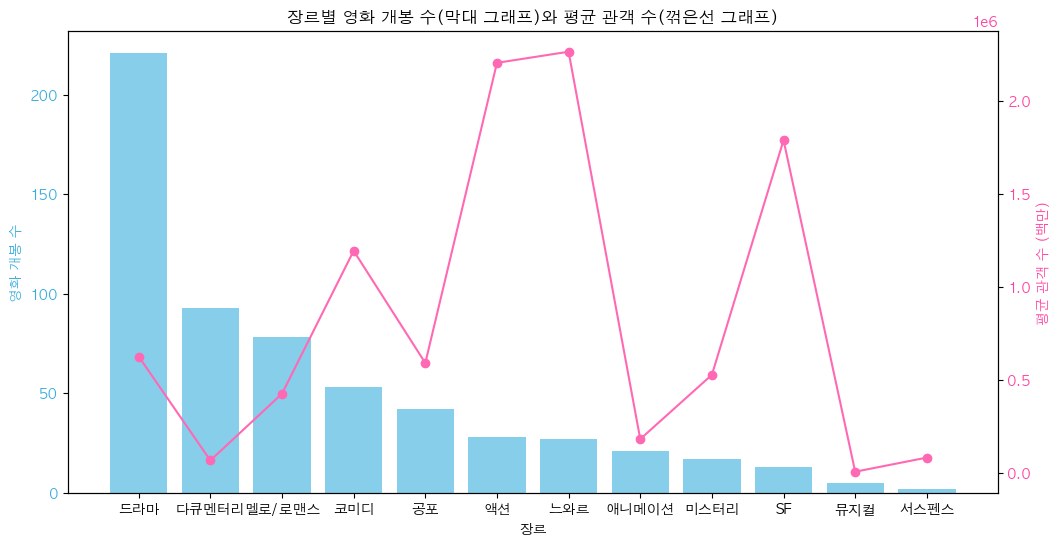

In [47]:
# 장르별 영화 개봉 수 계산
genre_counts = train['genre'].value_counts()

# 장르별 평균 관객 수 계산
avg_boxoff = train.groupby('genre')['box_off_num'].mean()
avg_boxoff = avg_boxoff[genre_counts.index]

# 그래프 생성
plt.figure(figsize=(12, 6))

# 장르별 영화 개봉 수 : 하늘색 막대 그래프 (왼쪽 y축)
plt.bar(genre_counts.index, genre_counts, color='skyblue')
plt.xlabel('장르')
plt.ylabel('영화 개봉 수', color='#3aadde')
plt.tick_params(axis='y', labelcolor='#3aadde')

# 장르별 평균 관객 수 : 분홍색 꺾은선 그래프 (오른쪽 y축)
ax2 = plt.twinx()
ax2.plot(avg_boxoff.index, avg_boxoff, marker='o', color='hotpink', linestyle='-')
ax2.set_ylabel('평균 관객 수 (백만)', color='#ff42a0')
ax2.tick_params(axis='y', labelcolor='#ff42a0')

plt.title('장르별 영화 개봉 수(막대 그래프)와 평균 관객 수(꺾은선 그래프)')
plt.show()

### 분석
> 가장 많이 개봉한 장르는 드라마, 다큐멘터리, 멜로/로맨스.  
> 느와르, 액션, SF, 코미디 장르는 다른 장르들과 비교했을 때 상대적으로 영화 개봉 수에 비해 평균 관객 수가 매우 높아 관객들에게 더 큰 관심과 인기를 누리고 있는 장르라는 것을 알 수 있다.  

* 이어지는 질문 > 왜 느와르, 액션, SF, 코미디 장르가 인기가 많을까?  
> 장르별 평균 스탭 수 살펴봄

# 3. 영화장르

## 3-1. 영화장르 별 스텝 수 

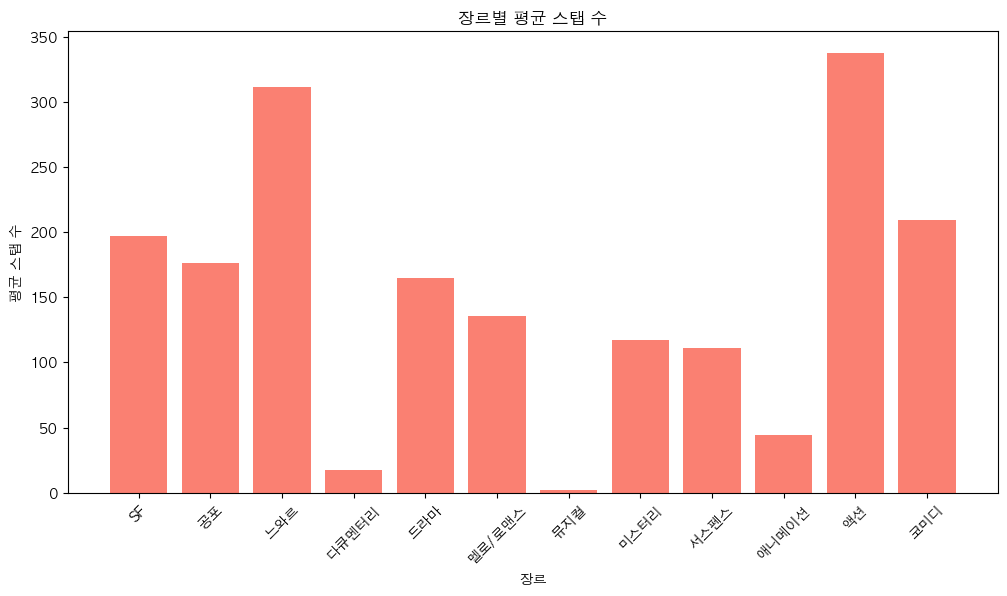

In [49]:
# 장르별 평균 스탭 수
genre_avg_staff = train.groupby('genre')['num_staff'].mean()

# 그래프 생성
plt.figure(figsize=(12, 6))

# x축은 장르, y축은 장르별 평균 스탭수
plt.bar(genre_avg_staff.index, genre_avg_staff.values, color='salmon')

plt.title('장르별 평균 스탭 수')
plt.xlabel('장르')
plt.ylabel('평균 스탭 수')
plt.xticks(rotation=45)  # x축 글자 45도 회전

plt.show()

### 분석  
> 느와르, 액션, SF, 코미디 장르가 관객들에게 인기가 많았는데, 평균 스탭 수도 가장 많음  
> 제작 과정에 많은 스태프와 예산이 투입되면 특수효과 등 영화의 퀄리티가 높을 것이고, 그만큼 시각적으로 풍부한 볼거리를 제공해주기 때문에 관객들에게 사랑받는 장르라고 해석할 수 있다.

## 3-2. 영화장르 별 손익분기 

#### 설명
- 손익분기점을 뜻하는 benefit 변수를 만들어줌. 
- 이 변수는 영화관객수를 스텝수를 이용한 변수임. 
- 영화관객수는 매출을 대표하고 스텝수는 비용을 대표함. 
- 아웃라이어가 극단적이기 때문에, 평균을 이용하지 않고 각각의 col의 median값으로 나눈 상수값을 도출  
- 그 상수값을 스텝수에 곱해줌 (아니면 둘 간 차이가 커서 inf값이 나오기 때문)
- 즉 benefit 변수는 box_off_num / [ num_staff*(box_off_num의 median /num_staff의 median) ] 으로 만들어짐 
- 따라서 이 benefit 변수는 매출/비용을 대략적으로 의미하기 때문에, 클수록 benefit이 크다고 볼 수 있음 

In [51]:
mycost = train.copy()
mycost = mycost[mycost.num_staff != 0] #분모에 0이 들어갈 수 없기 때문

In [52]:
mycost["num_staff"].describe()

count   568.0
mean    159.6
std     166.2
min       1.0
25%      21.0
50%      93.5
75%     279.5
max     869.0
Name: num_staff, dtype: float64

In [53]:
mycost["box_off_num"].describe()

count        568.0
mean      747639.6
std      1871079.8
min            2.0
25%         1530.5
50%        14658.5
75%       550735.0
max     14262766.0
Name: box_off_num, dtype: float64

In [54]:
14658.5/93.5

# benefit 변수가 inf로 가는 것을 막기 위해 분모에 곱해줄 상수 (관객수 중간값/스텝수 중간값)

156.77540106951872

In [55]:
mycost["benefit_5"]=mycost["box_off_num"]/(mycost["num_staff"]*156.8)

In [56]:
import numpy

def get_q(x):
    q0=x.quantile(0)
    q1=x.quantile(0.25)
    q2=x.quantile(0.5)
    q3=x.quantile(0.75)
    q4=x.quantile(1)
    q0=round(q0,3)
    q1=round(q1,3)
    q2=round(q2,3)
    q3=round(q3,3)
    q4=round(q4,3)
    return q0, q1, q2, q3, q4

In [57]:
costg = mycost.groupby("genre")["benefit_5"].agg(lambda x : get_q(x))

In [58]:
costg

genre
SF           (0.039, 0.197, 0.725, 27.177, 890.035)
공포            (0.005, 0.9, 10.603, 23.501, 143.536)
느와르          (0.023, 5.47, 24.352, 45.693, 179.232)
다큐멘터리       (0.032, 0.698, 2.051, 6.548, 10208.693)
드라마           (0.004, 0.149, 0.997, 12.239, 262.24)
멜로/로맨스         (0.002, 0.229, 1.381, 8.288, 91.089)
뮤지컬          (4.925, 7.541, 10.157, 18.091, 26.025)
미스터리          (0.034, 0.339, 0.811, 10.077, 94.074)
서스펜스             (4.38, 5.735, 7.091, 8.446, 9.801)
애니메이션     (0.003, 1.406, 15.675, 102.978, 1422.366)
액션          (0.011, 5.125, 18.753, 37.855, 129.393)
코미디         (0.003, 0.515, 6.237, 25.469, 1056.281)
Name: benefit_5, dtype: object

>의사결정

- 장르별로 비용 대비 수익을 대략적으로 걷는 추세가 어떤지 알아보기 위한 시각화
- 앞서 costg 라는 데이터는 장르별 quantile 값을 보여주고 있는데 , q3값과 max값이 아주 큰 차이를 보이고 있음 
- 이에 따라 max값까지 그렸을 때 의미있는 시각화가 되기 어렵다고 판단해 박스플랏을 통해 q3까지 그리고, 박스플랏에서 평균을 보여줌에 따라 q3 이후의 값들이 어떨지 대략적으로 표현해주기로 결정 (한 장르 내 median과 mean값의 크기가 클수록 극단적인 값들이 많다는 것이기 때문)

Text(0, 0.5, 'benefit')

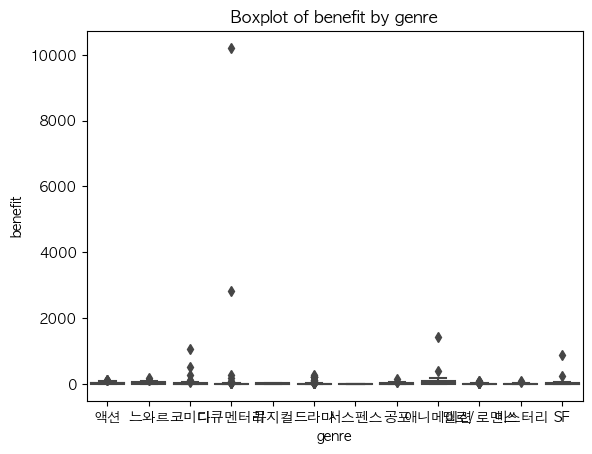

In [59]:
ax = plt.subplots()
ax = sns.boxplot(x="genre", y="benefit_5",data=mycost)
ax.set_title("Boxplot of benefit by genre")
ax.set_xlabel("genre")
ax.set_ylabel("benefit")

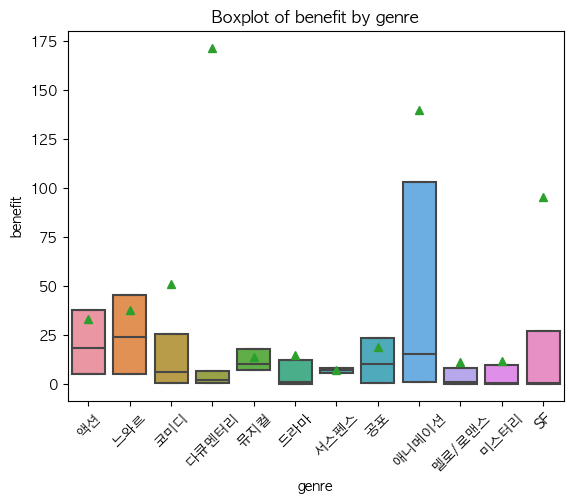

In [60]:
ax = plt.subplots()
ax = sns.boxplot(x="genre", y="benefit_5",data=mycost, whis=0,
                showfliers=False, showmeans=True)
ax.set_title("Boxplot of benefit by genre")
ax.set_xlabel("genre")
ax.set_ylabel("benefit")
plt.xticks(rotation=45)

plt.show()

### 분석

> 우선 해석에 있어서의 한계를 표현하자면 관객수가 매출을 대표할 수 있으나, 비용에는 스텝수 이외에도 많은 것들이 포함된다. 하지만 데이터 내 비용을 대표할 만한 값이 스텝수 이외에는 주연배우 수가 있었지만, 단순 합산하기도 자의적으로 특정 숫자로 가중치를 줘 합산하기도 어렵다고 생각했다. 또한 benefit이라는 변수를 만드는 과정에서 관객수와 스텝수 간 차이가 커 단순 나눴을 때 해당 값이 무한대로 발산했다. 이를 막기 위해 관객수와 스텝수의 중간값들을 활용했기 때문에 주연배우수를 이용했을 때 이 부분을 어떻게 또 고려해줘야 할지 어려워 사용하지 않았다. 결과적으로 스텝수가 영화의 비용적 측면을 대표한다는 점에서 해석에 한계가 있다는 점을 먼저 명시하고자 한다. 

> 우선 중간값을 기준으로 먼저 분석했을 때, 보다 통상적으로 손익분기를 잘 넘기는 것은 중간값들이 큰 액션, 느와르 장르라고 볼 수 있다. 또한 타장르에 비해 두 장르 모두 평균이 최소 박스 안에 들어와 있음을 봤을 때 이들의 경우 극단적인 비용 절감 대비 흥행 성공을 이룩하기는 어렵다고 판단된다. 

> 이에 반대되는 것이 다큐멘터리인데, 다큐멘터리의 경우 손익분기 box 값 범위 자체가 굉장히 작다. 하지만 mean값이 타 장르들과 비교해 압도적으로 크다. 이는 극단적인 비용 절감과 극단적인 흥행 성공 두가지 모두 이룩한 사례가 있다는 뜻이다.

> 또 흥미로운 부분은 뮤지컬과 서스펜스인데 이 둘은 타장르에 비해 q1값이 크다는 것이다. 이는 타장르 대비 손익분기를 쉽게 넘긴다는 뜻인데 장르적 특성을 고려했을 때 비교적 손익분기를 넘기기 힘든 독립영화에서 시도하기 힘든 장르라는 특성이 작용한 것 아닐까 싶다. 